In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Training set: 800 samples
Test set: 200 samples
Iteration 0, Cost: 0.6931
Iteration 200, Cost: 0.1575
Iteration 400, Cost: 0.1485
Iteration 600, Cost: 0.1434
Iteration 800, Cost: 0.1401

Test Accuracy: 95.50%


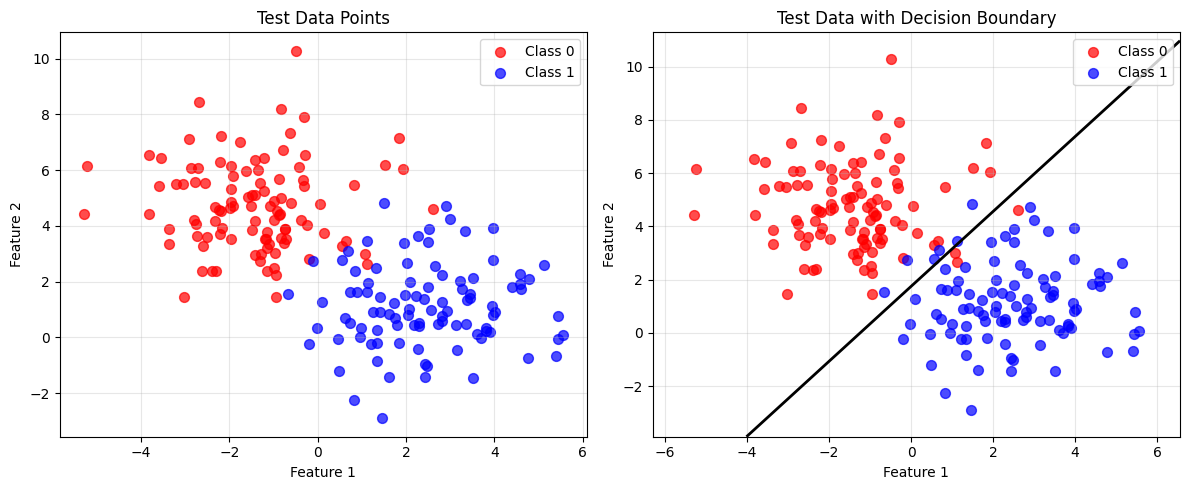

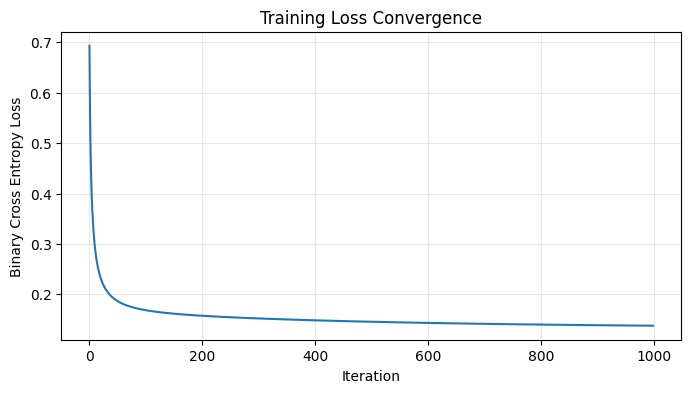

In [3]:
# 1. Generate synthetic dataset and split
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5,
                  random_state=42, center_box=(-5.0, 5.0))
y = y.reshape(-1, 1)  # Reshape for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 2. Sigmoid and Binary Cross Entropy functions
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Clip to prevent overflow

def binary_cross_entropy(y_true, y_pred):
    """Binary Cross Entropy (Log Loss)"""
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip to prevent log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 3. Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        """Train the model using Batch Gradient Descent"""
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for iteration in range(self.n_iterations):
            # Forward pass
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_output)

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track cost
            cost = binary_cross_entropy(y, y_pred)
            self.cost_history.append(cost)

            if iteration % 200 == 0:
                print(f"Iteration {iteration}, Cost: {cost:.4f}")

    def predict(self, X):
        """Predict binary classes (0 or 1)"""
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return (y_pred >= 0.5).astype(int)

    def predict_proba(self, X):
        """Predict probabilities"""
        linear_output = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_output)

# 4. Train the model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

# 5. Evaluate on test set
y_pred_test = model.predict(X_test)
accuracy = np.mean(y_pred_test == y_test) * 100
print(f"\nTest Accuracy: {accuracy:.2f}%")

# 6. Generate decision boundary visualization
plt.figure(figsize=(12, 5))

# Left subplot: Data points
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test.flatten() == 0, 0], X_test[y_test.flatten() == 0, 1],
           c='red', label='Class 0', alpha=0.7, s=50)
plt.scatter(X_test[y_test.flatten() == 1, 0], X_test[y_test.flatten() == 1, 1],
           c='blue', label='Class 1', alpha=0.7, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data Points')
plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot: Data with decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test.flatten() == 0, 0], X_test[y_test.flatten() == 0, 1],
           c='red', label='Class 0', alpha=0.7, s=50)
plt.scatter(X_test[y_test.flatten() == 1, 0], X_test[y_test.flatten() == 1, 1],
           c='blue', label='Class 1', alpha=0.7, s=50)

# Plot decision boundary
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
boundary = model.predict_proba(grid_points).reshape(xx1.shape)
plt.contour(xx1, xx2, boundary, levels=[0.5], colors='black', linewidths=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot training cost history
plt.figure(figsize=(8, 4))
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Training Loss Convergence')
plt.grid(True, alpha=0.3)
plt.show()

INSIGHTS FOR THE ABOVE MODEL:

1. Generate synthetic dataset and split
2. Sigmoid and Binary Cross Entropy functions
3. Logistic Regression Class
4. Train the model
        model = LogisticRegression(learning_rate=0.1, n_iterations=1000) model.fit(X_train, y_train
5. Evaluate on test set
        y_pred_test = model.predict(X_test) accuracy = np.mean(y_pred_test == y_test) * 100 print(f"\nTest Accuracy: {accuracy:.2f}%")
6. Generate decision boundary visualization
        plt.figure(figsize=(12, 5))

- Left subplot: Data points
- Right subplot: Data with decision boundary
- Plot decision boundary
- Plot training cost history

In short the Code:

- Creates fake 2D data.
- Implements logistic regression from scratch.
- Trains it using gradient descent.
- Evaluates accuracy.
- Visualizes decision boundary + training loss.
